# Sheet 3

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import torch

## 2 Projection Trick

(a)

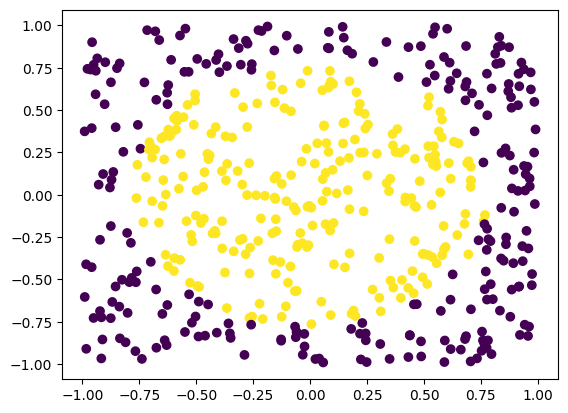

In [15]:
# Load the data
xy = np.load('data03/data2d.npy')
labels = np.load('data03/labels.npy')

# TODO: Plot the data
plt.scatter(xy[:,0], xy[:,1], c=labels)

0.558


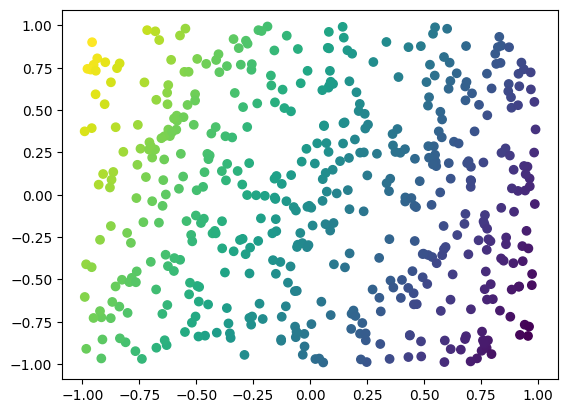

In [28]:
from sklearn.linear_model import LogisticRegression
# TODO: fit logistic regression]
clf = LogisticRegression().fit(xy, labels)

# TODO: compute the accuracy
print(clf.score(xy, labels))

# TODO: visualize the decision boundary
plt.scatter(xy[:,0], xy[:,1], c=clf.decision_function(xy))

This problem can't be solved with the projection trick, because the set of points is not convex. <br>
The accuracy of the fit is with $0.558$ close to just random guessing.

(b)

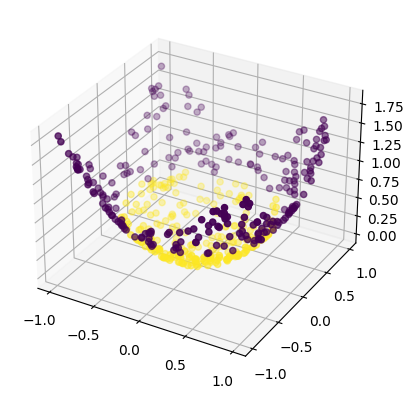

In [17]:
# TODO: Come up with a nonlinear tranformation for the third feature. Compute it and concatenate to the data.
z = xy[:,0]**2 + xy[:,1]**2
xyz = np.concatenate((xy, z[:,None]), axis=1)

# TODO: Show the enhanced data, e.g. with a 3D scatter plot 
#       (https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c=labels)

0.99


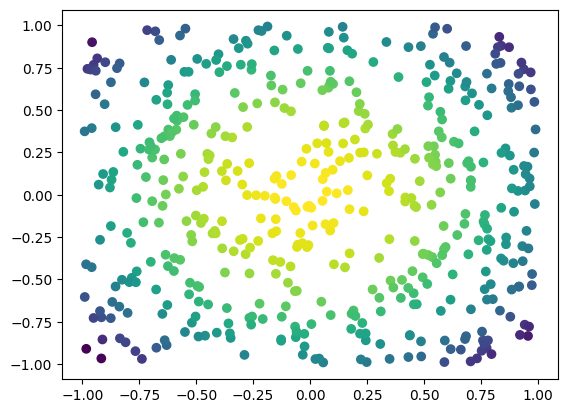

In [25]:
# TODO: again, fit and evaluate logistic regression
clf2 = LogisticRegression().fit(xyz, labels)
print(clf2.score(xyz, labels))
plt.scatter(xyz[:,0], xyz[:,1], c=clf2.decision_function(xyz))

If we enhance the problem to a 3D feature space, we can use the projection trick and increase the accuracy to $0.99$.

(c) <br>
The problem can be solved by an MLP with a single hidden layer, because the hidden layer can be used to project the data into a higher dimensional space, where the data is linearly separable. The output layer can then be used to project the data back into the original space.


## 3) Linear regions of MLPs

(a)

In [19]:
# TODO: define NN architecture

In [20]:
# TODO: instantiate the model and make the visualizations as requested in the task

(b)

In [21]:
# TODO: instantiate the model and make the visualizations as requested in the task

(c)

In [22]:
# TODO: instantiate the model and make the visualizations as requested in the task

(d)

In [23]:
# TODO: define NN architecture

In [24]:
# TODO: instantiate the model and make the visualizations as requested in the task